In [ ]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

14:47:41


In [ ]:
Direct_Detection = False
DP_Weights_Path = "/content/drive/MyDrive/YoloWeights/1C-FaceMask-DS/Run-1000e/best-908e.pt"

In [ ]:
# Deletion of any non empty folder

#import shutil
#shutil.rmtree('') # put the path you want to delete

# Set initial path

%cd /content

/content


In [ ]:
running_on_vm = True
#false --> running on colab
#true  --> running on vm

In [ ]:
delete_previous_data_set = True
# in case of running on vm
  #false --> keep previous dataset that was downloaded from robowflow
  #true  --> delete previous dataset

In [ ]:
code_exists_on_vm = False
# in case of running on vm
  #false --> download the code or modify it from github
  #true  --> dont download code from github or modify it

In [ ]:
if running_on_vm:
  mainfolderpath = '/content/SSD'
else:
  mainfolderpath = '/content'
%cd $mainfolderpath

/content/SSD


In [ ]:
#MOUNT GOOGLE DRIVE
if not running_on_vm:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

In [ ]:
import warnings;
warnings.filterwarnings('ignore');

In [ ]:
img_size = 320
batch = 32
epochs = 500

#Importing

In [ ]:
import torch
import torchvision
import numpy as np
import os
import cv2

# Dataset Configuration and Initial Weights


In [ ]:
#init_yolo = "yolov5s.pt"   # dummy weights for non pretrained
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5s6.pt"   # --> from drive for Pretrained weights with "imagenet", network s6
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5m6.pt"   # --> from drive for Pretrained weights with "imagenet" , network m6
# init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5s.pt" # coco , network s
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5n.pt" # coco , network n
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5m.pt" # coco , network m

#init_yolo = "Custom path"  # --> write custom path here

In [ ]:
#class_names = ['Gun']
#class_names = ['Weapon']
#class_names = ['Gun' , 'LongGun']
class_names = ['Gun' , 'LongGun' , 'PartialGun']
#class_names = ['Gun' , 'LongGun' , 'NotGun', 'PartialGun']

#class_names = ['Face']
#class_names = ['with_mask' , 'without_mask' , 'mask_weared_incorrect']  not used with small initials due to order in cofusion matrix is alphabetical (dummy is small initial to be always the last)
#class_names = ['Mask_weared_incorrect' , 'With_mask' , 'Without_mask' , ] # classes is  labeled by its number , not name, so no problem for change initials to capital

num_of_classes = len(class_names)
print(num_of_classes)

3


In [ ]:
import shutil
import os

%cd $mainfolderpath

if running_on_vm and delete_previous_data_set:
    try:
        shutil.rmtree('train')
        shutil.rmtree('test')
        shutil.rmtree('valid')
        os.remove('README.dataset.txt')
        os.remove('README.roboflow.txt')
        os.remove('data.yaml')
    except:
        No_Error = 0

/content/SSD


In [ ]:
if (not running_on_vm) or (running_on_vm and delete_previous_data_set):

  #Dataset 1 class:
  if num_of_classes ==1:
    #DS1CFace- Original
    #!curl -L "https://app.roboflow.com/ds/Ta3ZuCz3nh?key=tlmDfUD8sr" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS1 mini - 0 Original    [892]
    #!curl -L "https://app.roboflow.com/ds/DZXNaYaMDv?key=TFnRmq6EGK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 1 Augm        [2142]
    #!curl -L "https://app.roboflow.com/ds/Yugj7EsqVp?key=BGC5JRoVir" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 2 Augm Blur   [2142]
    #!curl -L "https://app.roboflow.com/ds/6ZwCWrb5YQ?key=AIPCtcwt1V" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 3 Augm Noise  [2142]
    #!curl -L "https://app.roboflow.com/ds/okBMatCcLc?key=sh78iKEUae" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS1 full - 0 Original    [2971]
    #!curl -L "https://app.roboflow.com/ds/d27tX4Tsyi?key=LHaM7Pz2VP" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 1 Augm        [7131]
    #!curl -L "https://app.roboflow.com/ds/2tPjmCTXdJ?key=GEEeyT7ATS" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 2 Augm Blur   [7131]
    #!curl -L "https://app.roboflow.com/ds/S3iQDOb38a?key=xaiKB6BIKE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 3 Augm Noise  [7131]
    #!curl -L "https://app.roboflow.com/ds/j9PDHIvJ9g?key=iWZVXEn5Ba" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


    #DSW1 - 0 Original-S320 [2020]-2 Pascal VOC XML format
    !curl -L "https://app.roboflow.com/ds/J8qlV3YJKP?key=YqMjmbT7HJ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSW1 - 0 Original-S320 [2020]-2 images new-2389 instances
    #!curl -L "https://app.roboflow.com/ds/3YFapwuNvF?key=oqjxahiMpE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original-S448 [2020]-2 images new-2389 instances
    #!curl -L "https://app.roboflow.com/ds/sR5GPeb6QN?key=tEvVK85WRC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original-S640 [2020]-2 images new-2389 instances
    #!curl -L "https://app.roboflow.com/ds/Uy0p7zqv8c?key=zSXEovmzIQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSW1 - 0 Original [2020] images new-2380 instances
    #!curl -L "https://app.roboflow.com/ds/IL3OuUMwc9?key=V5hHQCzhDj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original [2020] images - old deleted
    #!curl -L "https://app.roboflow.com/ds/K24gaje1Br?key=rXD8tHioDa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original        [2067]
    #!curl -L "https://app.roboflow.com/ds/JUZcrDan8k?key=sUILHztMLA" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 1 Augm            [3512] - old deleted
    #!curl -L "https://app.roboflow.com/ds/c0PqTxDfiG?key=F2GVqBp9dg" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 2 Augm Blur
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 3 Augm Noise
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 2 Classes:
  if num_of_classes ==2:
    #DS2CW- 0 Original-S320 [2020]-2 Pascal VOC XML format
    !curl -L "https://app.roboflow.com/ds/CnBmIYDxu4?key=rbnRxnPMog" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS2CW- 0 Original        [2020]-2
    #!curl -L "https://app.roboflow.com/ds/15OEe6WAbb?key=iXZbEA6wIZ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS2CW- 0 Original        [2020]
    #!curl -L "https://app.roboflow.com/ds/BEsYJthyCg?key=OzELo1fx7W" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSG2 - 0 Original        [1568]
    #!curl -L "https://app.roboflow.com/ds/b08m11oX6U?key=lv8sgLBRNq" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 1 Augm            [3778]
    #!curl -L "https://app.roboflow.com/ds/XA80St7JCu?key=jdQY4NeRDj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 2 Augm Blur
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 3 Augm Noise
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 3 Classes:
  if num_of_classes ==3:
    #DS3CW- 0 Original-S320 [2020]-2 Pascal VOC XML format
    !curl -L "https://app.roboflow.com/ds/iCYl0YL4UM?key=nXpBhHm0XC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS3CFace- Original
    #!curl -L "https://app.roboflow.com/ds/zHVGdYkiJj?key=GYaTug9xIw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CW- 0 Original        [2020]-2
    #!curl -L "https://app.roboflow.com/ds/0j9Pn4MCZ4?key=ukwMJ9XET4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CW- 0 Original        [2020]
    #!curl -L "https://app.roboflow.com/ds/8VgCuytJ62?key=g3Dcrc2cx4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS3 - 0 Original Balance [1596]
    #!curl -L "https://app.roboflow.com/ds/lIbyLUIz7D?key=8C5aw7suSh" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 0 Augm Balance     [3841]
    #!curl -L "https://app.roboflow.com/ds/3C1Ge2kAS4?key=VGmFElZTdm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS3 - 0 Original
    #!curl -L "https://app.roboflow.com/ds/uiNpxoDdUs?key=exz831vMZz" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 1 Augm
    #!curl -L "https://app.roboflow.com/ds/LvMGQzLES0?key=6ANGFpxV4A" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 2 Augm Blur
    #!curl -L "https://app.roboflow.com/ds/WObMXtfHfs?key=oSl4WnjUYv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 3 Augm Noise
    #!curl -L "https://app.roboflow.com/ds/TErt9hwwip?key=R3zUnzFA2W" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 4 Classes:
  if num_of_classes ==4:
    #DS4 - 0 Original Balance [1599]
    !curl -L "https://app.roboflow.com/ds/LwaUHPRqG9?key=6jqGV0fnSL" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 0 Augm Balance     [3809]
    #!curl -L "https://app.roboflow.com/ds/AYtjRHgDAR?key=wDWc1Lh1E8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS4 - 0 Original
    #!curl -L "https://app.roboflow.com/ds/QHCLbNabyM?key=acVqMYm7sV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 1 Augm
    #!curl -L "https://app.roboflow.com/ds/b9xg1NJXys?key=wEOzoBV21g" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 2 Augm Blur
    #!curl -L "https://app.roboflow.com/ds/QAHbD0HaXD?key=jkbV2eEp0f" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 3 Augm Noise
    #!curl -L "https://app.roboflow.com/ds/8gmcgzNLsY?key=yWmU8PhWZa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
 #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   900  100   900    0     0   2812      0 --:--:-- --:--:-- --:--:--  2812
100 25.7M  100 25.7M    0     0  17.2M      0  0:00:01  0:00:01 --:--:-- 48.8M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/10098CG_jpg.rf.b78c7651ef6c4fde958f6d08f906cc53.jpg  
  inflating: test/10098CG_jpg.rf.b78c7651ef6c4fde958f6d08f906cc53.xml  
 extracting: test/10102EP_jpg.rf.c422a25df929c520c65612a7d5a9e7e6.jpg  
  inflating: test/10102EP_jpg.rf.c422a25df929c520c65612a7d5a9e7e6.xml  
 extracting: test/10115CG_jpg.rf.ded9896aee76e4117a158db3dc425fae.jpg  
  inflating: test/10115CG_jpg.rf.ded9896aee76e4117a158db3dc425fae.xml  
 extracting: test/10130CG_jpg.rf.d018e2f96e65943c39cb93232b0797cf.jpg  
  inflating: test/10130CG_jpg.rf.d018e2f96e65943c39cb93232b079

In [ ]:
import xml.etree.ElementTree as ET
import os

def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    boxes = []
    labels = []

    for obj in root.findall("object"):
        label = obj.find("name").text  # Get object class name
        bbox = obj.find("bndbox")  # Bounding box coordinates

        x_min = int(bbox.find("xmin").text)
        y_min = int(bbox.find("ymin").text)
        x_max = int(bbox.find("xmax").text)
        y_max = int(bbox.find("ymax").text)

        boxes.append([x_min, y_min, x_max, y_max])
        labels.append(label)

    return {"boxes": boxes, "labels": labels}


In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

import torch

class PascalVOCDataset(Dataset):
    def __init__(self, dataset_dir, transform=None, class_map=None):
        self.dataset_dir = dataset_dir
        self.images = sorted([f for f in os.listdir(dataset_dir) if f.endswith(".jpg")])
        self.transform = transform
        #self.class_map = class_map or {"Weapon": 1}  # Example classes
        self.class_map = {name: i + 1 for i, name in enumerate(class_names)}

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.dataset_dir, img_name)
        annotation_path = os.path.join(self.dataset_dir, img_name.replace(".jpg", ".xml"))

        # Load Image
        image = Image.open(img_path).convert("RGB")

        # Load and Process Annotation
        annotation = parse_voc_annotation(annotation_path)

        boxes = torch.tensor(annotation["boxes"], dtype=torch.float32)  # Convert to tensor
        labels = torch.tensor([self.class_map[label] for label in annotation["labels"]], dtype=torch.int64)  # Convert labels to numbers

        targets = {"boxes": boxes, "labels": labels}

        if self.transform:
            image = self.transform(image)

        return image, targets  # Return correct format


In [ ]:
def collate_fn(batch):
    images, targets = zip(*batch)  # Unpack batch into images and targets
    images = list(images)  # Keep images as a list
    targets = list(targets)  # Keep targets as a list of dicts
    return images, targets


In [ ]:
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

In [ ]:
dataset = PascalVOCDataset("train/", transform=transform)

In [ ]:
dataloader = DataLoader(dataset, batch_size=batch, shuffle=True, collate_fn=collate_fn)

# Train

In [ ]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

14:47:48


In [ ]:
import torch.optim as optim
import torchvision

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained SSD model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.to(device)
model.train()  # Set to training mode

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# ===============================
# 5️⃣ Training Loop
# ===============================

for epoch in range(epochs):
    total_loss = 0

    for images, targets in dataloader:
        images = [img.to(device) for img in images]  # Move images to GPU
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move labels to GPU

        optimizer.zero_grad()
        loss_dict = model(images, targets)  # Forward pass
        loss = sum(loss for loss in loss_dict.values())
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}")

Epoch [1/500], Loss: 266.9654
Epoch [2/500], Loss: 191.5602
Epoch [3/500], Loss: 160.5290
Epoch [4/500], Loss: 133.0360
Epoch [5/500], Loss: 114.0406
Epoch [6/500], Loss: 96.4416
Epoch [7/500], Loss: 82.5878
Epoch [8/500], Loss: 71.6512
Epoch [9/500], Loss: 64.1586
Epoch [10/500], Loss: 58.8883
Epoch [11/500], Loss: 52.8878
Epoch [12/500], Loss: 47.2667
Epoch [13/500], Loss: 42.6885
Epoch [14/500], Loss: 38.9222
Epoch [15/500], Loss: 35.6982
Epoch [16/500], Loss: 33.3352
Epoch [17/500], Loss: 31.0945
Epoch [18/500], Loss: 28.4857
Epoch [19/500], Loss: 26.0995
Epoch [20/500], Loss: 23.6522
Epoch [21/500], Loss: 22.9795
Epoch [22/500], Loss: 22.7227
Epoch [23/500], Loss: 20.7479
Epoch [24/500], Loss: 18.6014
Epoch [25/500], Loss: 17.2603
Epoch [26/500], Loss: 16.0801
Epoch [27/500], Loss: 15.6634
Epoch [28/500], Loss: 15.0737
Epoch [29/500], Loss: 14.1096
Epoch [30/500], Loss: 13.2969
Epoch [31/500], Loss: 12.3073
Epoch [32/500], Loss: 11.7835
Epoch [33/500], Loss: 11.1217
Epoch [34/500]

In [ ]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

20:38:49


#Validate

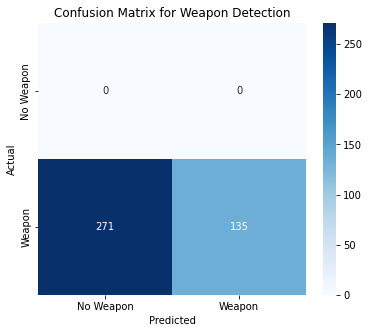

              precision    recall  f1-score   support

   No Weapon       0.00      0.00      0.00         0
      Weapon       1.00      0.33      0.50       406

    accuracy                           0.33       406
   macro avg       0.50      0.17      0.25       406
weighted avg       1.00      0.33      0.50       406



In [ ]:
import torch
import torchvision
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report

# ===============================
# 1️⃣ Load Pretrained SSD Model
# ===============================
model.eval()

# ===============================
# 2️⃣ Load Test Images from Folder
# ===============================
test_folder = "valid"  # 🔥 Change this to your test folder
image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(".jpg")]

# Image Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
])

# ===============================
# 3️⃣ Run Model on Test Images
# ===============================
iou_threshold = 0.5  # Intersection over Union threshold for TP
ground_truths = []  # True labels
predictions = []  # Predicted labels

with torch.no_grad():
    for image_path in image_files:
        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_tensor = transform(image).unsqueeze(0).to(device)

        # Predict
        output = model(image_tensor)[0]
        pred_boxes = output['boxes'].cpu().numpy()
        pred_scores = output['scores'].cpu().numpy()
        pred_labels = output['labels'].cpu().numpy()

        # Filter predictions (Keep only "Weapon" class with score > 0.5)
        detected_weapon = any((label == 1 and score > 0.5) for label, score in zip(pred_labels, pred_scores))

        # Load ground truth (Assume all images in test folder have a weapon)
        ground_truth = 1  # 1 = Weapon

        # Append results
        ground_truths.append(ground_truth)
        predictions.append(1 if detected_weapon else 0)

# ===============================
# 4️⃣ Compute Confusion Matrix
# ===============================
cm = confusion_matrix(ground_truths, predictions)
labels = ["No Weapon", "Weapon"]

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Weapon Detection")
plt.show()

# Print Classification Report
print(classification_report(ground_truths, predictions, target_names=labels))


#Test

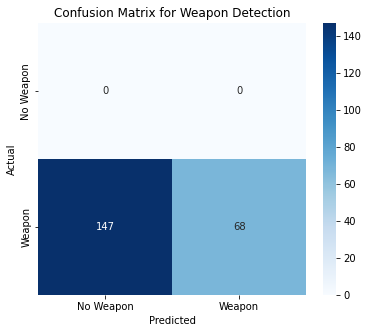

              precision    recall  f1-score   support

   No Weapon       0.00      0.00      0.00         0
      Weapon       1.00      0.32      0.48       215

    accuracy                           0.32       215
   macro avg       0.50      0.16      0.24       215
weighted avg       1.00      0.32      0.48       215



In [ ]:
import torch
import torchvision
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report

# ===============================
# 1️⃣ Load Pretrained SSD Model
# ===============================
model.eval()

# ===============================
# 2️⃣ Load Test Images from Folder
# ===============================
test_folder = "test"  # 🔥 Change this to your test folder
image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(".jpg")]

# Image Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
])

# ===============================
# 3️⃣ Run Model on Test Images
# ===============================
iou_threshold = 0.5  # Intersection over Union threshold for TP
ground_truths = []  # True labels
predictions = []  # Predicted labels

with torch.no_grad():
    for image_path in image_files:
        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_tensor = transform(image).unsqueeze(0).to(device)

        # Predict
        output = model(image_tensor)[0]
        pred_boxes = output['boxes'].cpu().numpy()
        pred_scores = output['scores'].cpu().numpy()
        pred_labels = output['labels'].cpu().numpy()

        # Filter predictions (Keep only "Weapon" class with score > 0.5)
        detected_weapon = any((label == 1 and score > 0.5) for label, score in zip(pred_labels, pred_scores))

        # Load ground truth (Assume all images in test folder have a weapon)
        ground_truth = 1  # 1 = Weapon

        # Append results
        ground_truths.append(ground_truth)
        predictions.append(1 if detected_weapon else 0)

# ===============================
# 4️⃣ Compute Confusion Matrix
# ===============================
cm = confusion_matrix(ground_truths, predictions)
labels = ["No Weapon", "Weapon"]

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Weapon Detection")
plt.show()

# Print Classification Report
print(classification_report(ground_truths, predictions, target_names=labels))


# Show images

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from torchvision import transforms
import time
# ===============================
# 1️⃣ Load Pretrained SSD Model
# ===============================
def detect(path):
  inference_time = []
  model.eval()

  # ===============================
  # 2️⃣ Load Test Image
  # ===============================
  test_folder = path
  image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(".jpg")]

  # Transform for SSD
  transform = transforms.Compose([
      transforms.ToTensor(),
  ])

  # ===============================
  # 3️⃣ Run Model on Images & Show Results
  # ===============================
  for image_path in image_files:
      start_time = time.time()
      # Load image
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
      image_tensor = transform(image).unsqueeze(0).to(device)

      # Predict
      with torch.no_grad():
          output = model(image_tensor)[0]

      # Get detection results
      pred_boxes = output['boxes'].cpu().numpy()
      pred_scores = output['scores'].cpu().numpy()
      pred_labels = output['labels'].cpu().numpy()

      # Draw bounding boxes
      for box, score, label in zip(pred_boxes, pred_scores, pred_labels):
          if score > 0.5:  # Confidence threshold
              x1, y1, x2, y2 = map(int, box)
              cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green Box
              cv2.putText(image, f"Weapon {score:.2f}", (x1, y1 - 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

      # Show Image
      plt.figure(figsize=(8, 6))
      plt.imshow(image)
      plt.axis("off")
      plt.show()
      end_time = time.time()
      execution_time = end_time - start_time
      inference_time.append(execution_time)
      print(f"image : {image_path} {execution_time} seconds")
  print(f"Average inference time: {np.mean(inference_time)} seconds")

In [ ]:
detect('test')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

20:40:07
